In [1]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook

import torch
import os


In [2]:
#path = "outputs/Backbone/FashionMNIST/latent_dim_3/"
#path = "outputs/Posthoc/FashionMNIST/latent_dim_3/"
#path = "outputs/PFE/FashionMNIST/latent_dim_3/"
path = "outputs/Online/FashionMNIST/latent_dim_3/"
z_mu = torch.load(f"{path}/z_mu.pt").numpy()
labels = torch.load(f"{path}/labels.pt").numpy()

if os.path.isfile(f"{path}/z_sigma.pt"):
    z_sigma = torch.load(f"{path}/z_sigma.pt").numpy()
    z_samples = torch.load(f"{path}/z_samples.pt").numpy()
    
    ood_z_sigma = torch.load(f"{path}/ood_z_sigma.pt").numpy()
    ood_z_samples = torch.load(f"{path}/ood_z_samples.pt").numpy()

ood_z_mu = torch.load(f"{path}/ood_z_mu.pt").numpy()
ood_labels = torch.load(f"{path}/ood_labels.pt").numpy()


In [3]:
z_mu.shape

(10000, 3)

# Classes

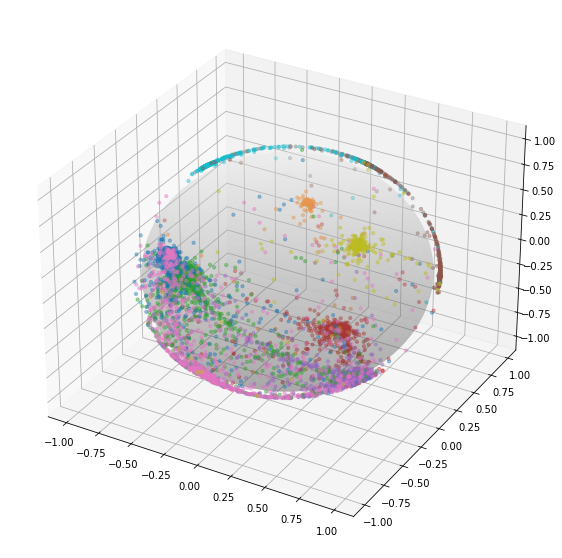

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
r = 0.95
u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:100j]
x = r * np.cos(u) * np.sin(v)
y = r * np.sin(u) * np.sin(v)
z = r * np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.gray, alpha=0.2)

z_samples = z_mu
for i in range(10):
    z = z_samples[labels == i]
    ax.scatter(z[:, 0], z[:, 1], z[:, 2], s=10, alpha=0.4)

#ax.view_init(-140, 60)
plt.show()

# OOD vs ID

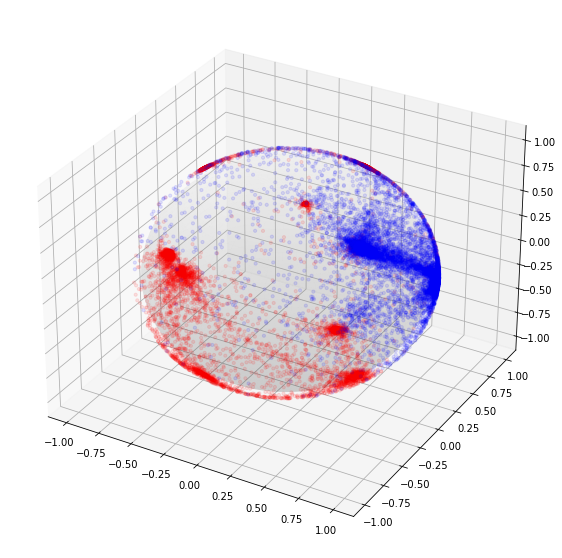

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
r = 0.95
u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:100j]
x = r * np.cos(u) * np.sin(v)
y = r * np.sin(u) * np.sin(v)
z = r * np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.gray, alpha=0.1)

points = ood_z_mu
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=10, c='b', alpha=0.1)

"""
plt.show()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap=plt.cm.gray, alpha=0.2)
"""
points = z_mu
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=10, c='r', alpha=0.1)

plt.show()

# Uncertainty (threshold)

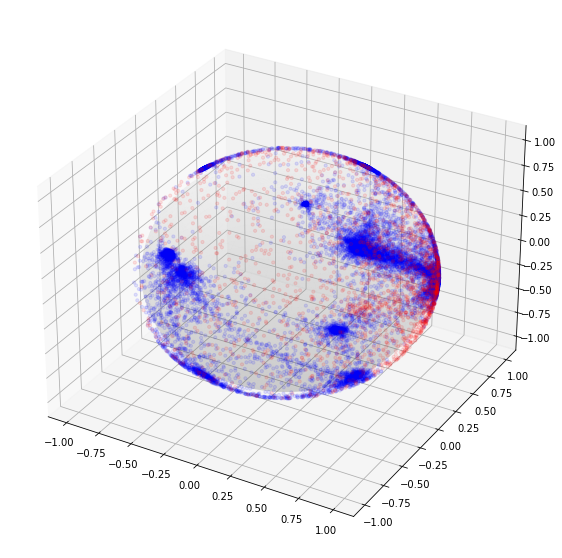

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
r = 0.95
u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:100j]
x = r * np.cos(u) * np.sin(v)
y = r * np.sin(u) * np.sin(v)
z = r * np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.gray, alpha=0.1)

all_points = np.concatenate([z_mu, ood_z_mu])
all_sigma = np.concatenate([z_sigma, ood_z_sigma]).mean(axis=1)

points = all_points[all_sigma < np.mean(all_sigma)]
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=10, c='b', alpha=0.1)

"""
plt.show()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap=plt.cm.gray, alpha=0.2)
"""
points = all_points[all_sigma > np.mean(all_sigma)]
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=10, c='r', alpha=0.1)

plt.show()

# Uncertainty (colormap)

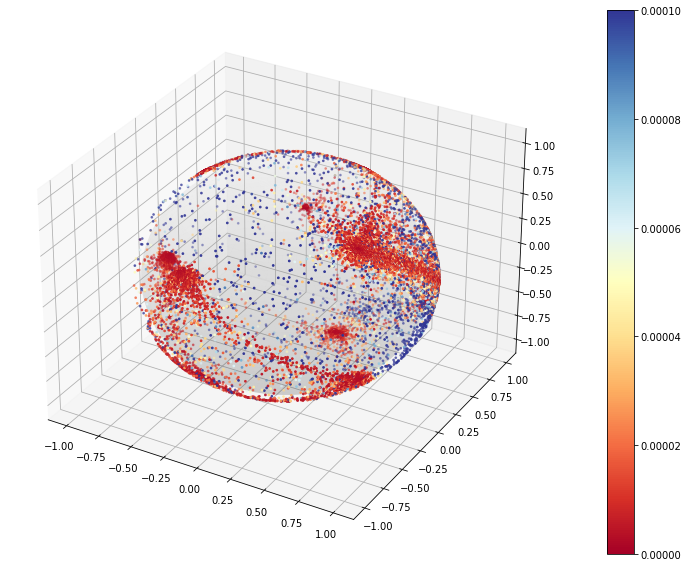

In [7]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='3d')
r = 0.95
u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:100j]
x = r * np.cos(u) * np.sin(v)
y = r * np.sin(u) * np.sin(v)
z = r * np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.gray, alpha=0.1)

all_points = np.concatenate([z_mu, ood_z_mu])
all_sigma = np.concatenate([z_sigma, ood_z_sigma]).mean(axis=1)

points = all_points
sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], s = 3, c=all_sigma, vmin=0, vmax=0.0001, cmap=plt.cm.get_cmap('RdYlBu'))
plt.colorbar(sc)

plt.show()

# plot side by side

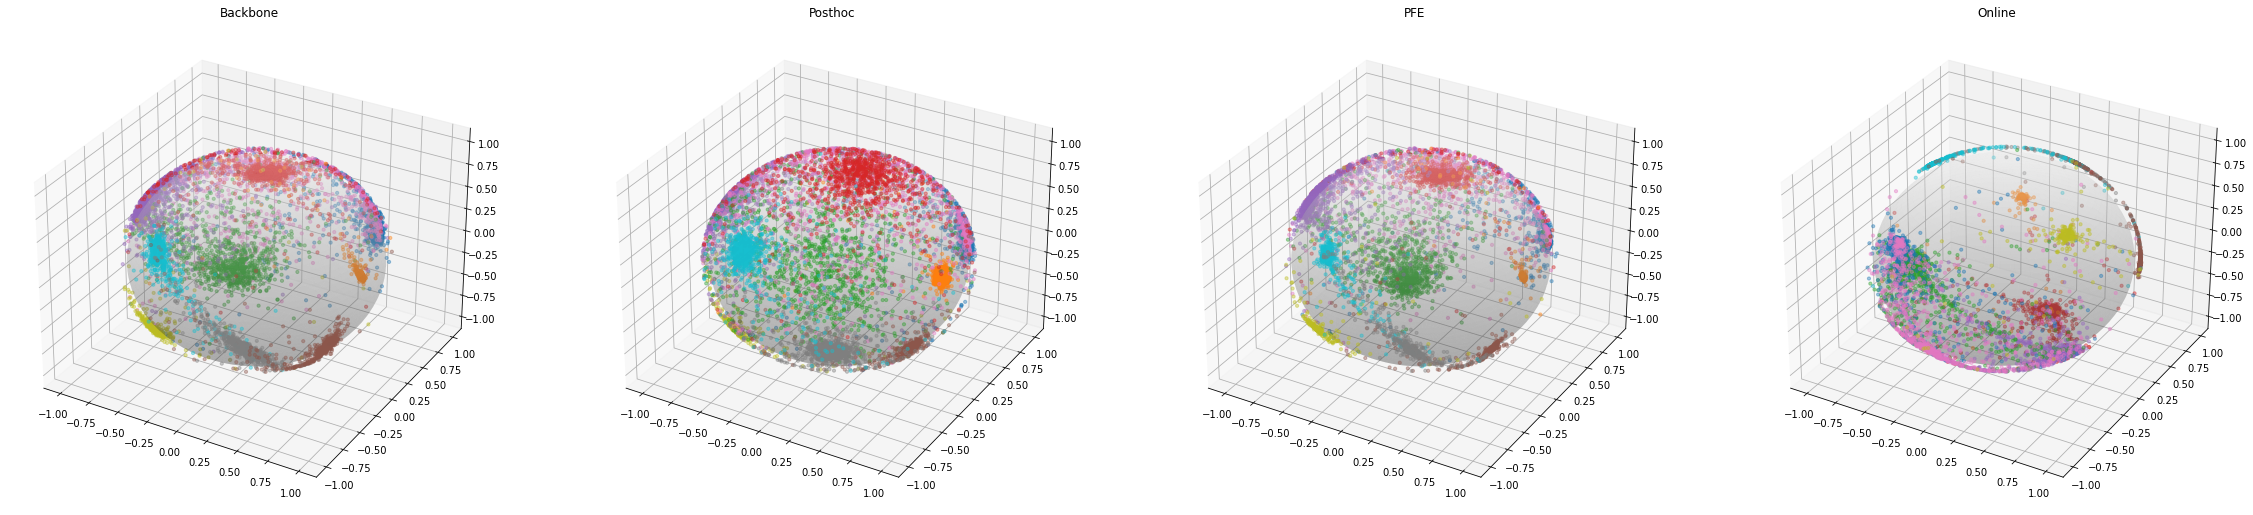

In [14]:
paths = ["outputs/Backbone/FashionMNIST/latent_dim_3/", "outputs/Posthoc/FashionMNIST/latent_dim_3/", "outputs/PFE/FashionMNIST/latent_dim_3/", "outputs/Online/FashionMNIST/latent_dim_3/"]
fig = plt.figure(figsize=(40, 10))
for i, path in enumerate(paths):

    z_mu = torch.load(f"{path}/z_mu.pt").numpy()
    labels = torch.load(f"{path}/labels.pt").numpy()

    if os.path.isfile(f"{path}/z_sigma.pt"):
        z_sigma = torch.load(f"{path}/z_sigma.pt").numpy()
        z_samples = torch.load(f"{path}/z_samples.pt").numpy()
        
        ood_z_sigma = torch.load(f"{path}/ood_z_sigma.pt").numpy()
        ood_z_samples = torch.load(f"{path}/ood_z_samples.pt").numpy()

    ood_z_mu = torch.load(f"{path}/ood_z_mu.pt").numpy()
    ood_labels = torch.load(f"{path}/ood_labels.pt").numpy()
    
    ax = fig.add_subplot(1,4,i+1, projection='3d')
    r = 0.95
    u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:100j]
    x = r * np.cos(u) * np.sin(v)
    y = r * np.sin(u) * np.sin(v)
    z = r * np.cos(v)
    ax.plot_surface(x, y, z, cmap=plt.cm.gray, alpha=0.2)

    z_samples = z_mu
    for i in range(10):
        z = z_samples[labels == i]
        ax.scatter(z[:, 0], z[:, 1], z[:, 2], s=10, alpha=0.4)
        
    plt.title(path.split("/")[1])

    #ax.view_init(-140, 60)
plt.show()


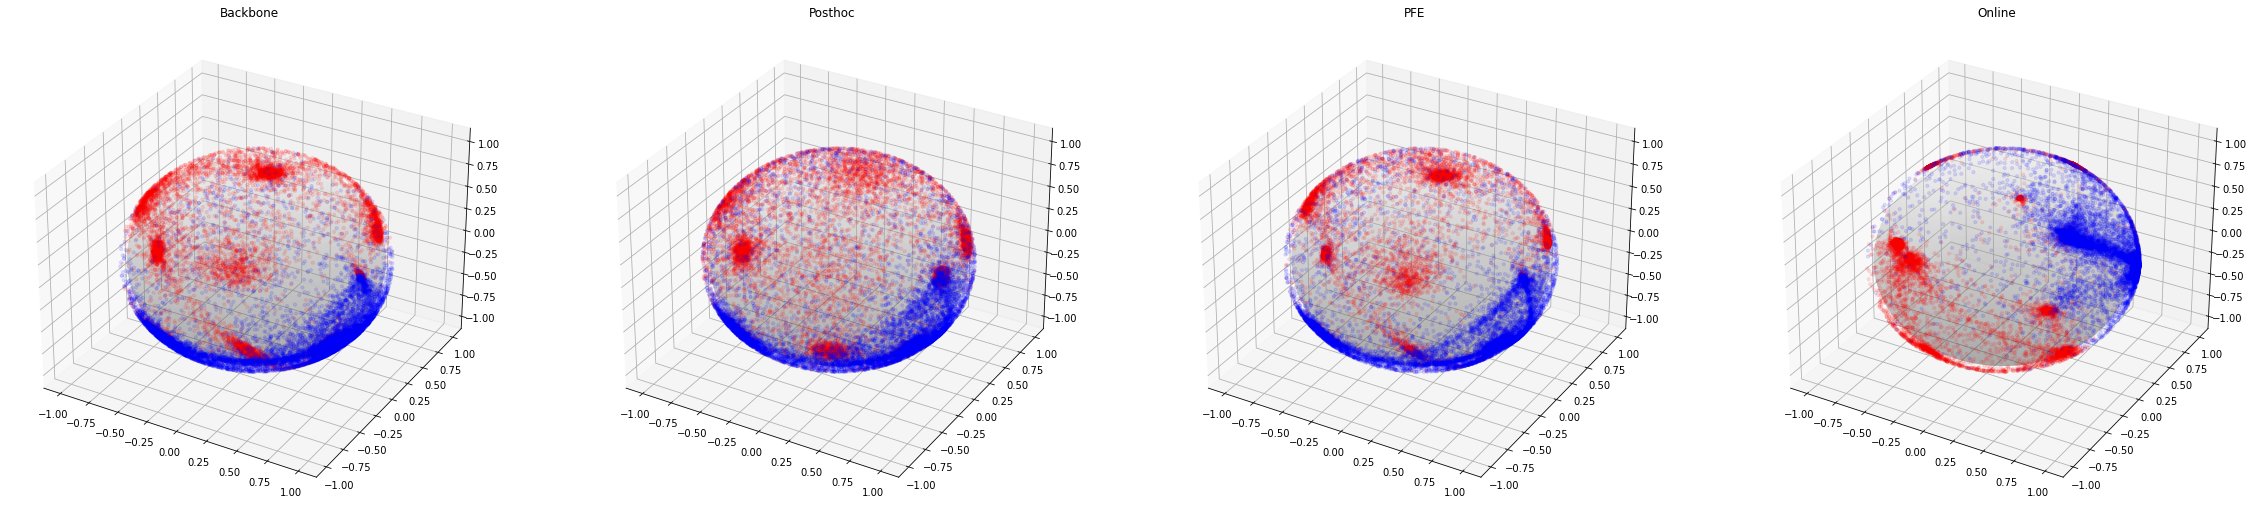

In [15]:
fig = plt.figure(figsize=(40, 10))
for i, path in enumerate(paths):

    z_mu = torch.load(f"{path}/z_mu.pt").numpy()
    labels = torch.load(f"{path}/labels.pt").numpy()

    if os.path.isfile(f"{path}/z_sigma.pt"):
        z_sigma = torch.load(f"{path}/z_sigma.pt").numpy()
        z_samples = torch.load(f"{path}/z_samples.pt").numpy()
        
        ood_z_sigma = torch.load(f"{path}/ood_z_sigma.pt").numpy()
        ood_z_samples = torch.load(f"{path}/ood_z_samples.pt").numpy()

    ood_z_mu = torch.load(f"{path}/ood_z_mu.pt").numpy()
    ood_labels = torch.load(f"{path}/ood_labels.pt").numpy()
    
    ax = fig.add_subplot(1,4,i+1, projection='3d')
    r = 0.95
    u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:100j]
    x = r * np.cos(u) * np.sin(v)
    y = r * np.sin(u) * np.sin(v)
    z = r * np.cos(v)
    ax.plot_surface(x, y, z, cmap=plt.cm.gray, alpha=0.2)

    points = ood_z_mu
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=10, c='b', alpha=0.1)

    points = z_mu
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=10, c='r', alpha=0.1)
        
    plt.title(path.split("/")[1])

    #ax.view_init(-140, 60)
plt.show()


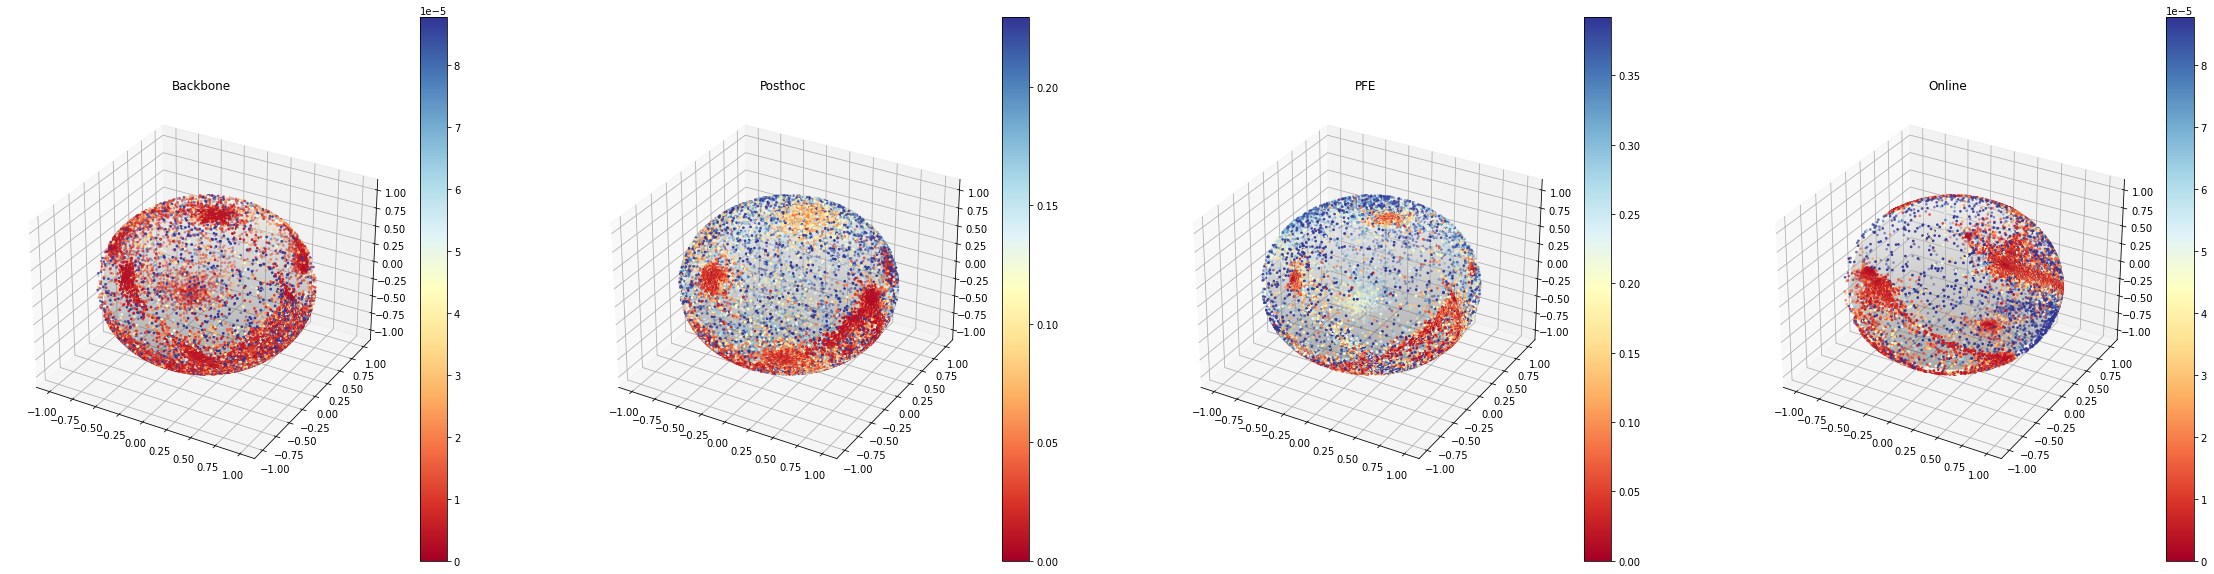

In [18]:
fig = plt.figure(figsize=(40, 10))
for i, path in enumerate(paths):

    z_mu = torch.load(f"{path}/z_mu.pt").numpy()
    labels = torch.load(f"{path}/labels.pt").numpy()

    if os.path.isfile(f"{path}/z_sigma.pt"):
        z_sigma = torch.load(f"{path}/z_sigma.pt").numpy()
        z_samples = torch.load(f"{path}/z_samples.pt").numpy()
        
        ood_z_sigma = torch.load(f"{path}/ood_z_sigma.pt").numpy()
        ood_z_samples = torch.load(f"{path}/ood_z_samples.pt").numpy()

    ood_z_mu = torch.load(f"{path}/ood_z_mu.pt").numpy()
    ood_labels = torch.load(f"{path}/ood_labels.pt").numpy()
    
    ax = fig.add_subplot(1,4,i+1, projection='3d')
    r = 0.95
    u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:100j]
    x = r * np.cos(u) * np.sin(v)
    y = r * np.sin(u) * np.sin(v)
    z = r * np.cos(v)
    ax.plot_surface(x, y, z, cmap=plt.cm.gray, alpha=0.2)

    all_points = np.concatenate([z_mu, ood_z_mu])
    all_sigma = np.concatenate([z_sigma, ood_z_sigma]).mean(axis=1)

    points = all_points
    sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], s = 3, c=all_sigma, vmin=0, vmax=np.percentile(all_sigma, 90), cmap=plt.cm.get_cmap('RdYlBu'))
    plt.colorbar(sc)
        
    plt.title(path.split("/")[1])

    #ax.view_init(-140, 60)
plt.show()


